# Trabalho da Matéria "Programação com Python"

Aluno: Matheus Augusto Oliveira dos Santos


In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
df_data = pd.read_csv(file_name)

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
satis_lvl = pd.read_excel(file_name)

In [ ]:
df_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
df_data.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [ ]:
satis_lvl.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
satis_lvl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


## Descriçãdo dos atributos
Iremos fazer uma junção de dois datasets e os dois juntos apresentam:
 - 11 colunas e 14999 linhas
 - Os dados estão indexados de 0 à 1498
 
 <br><br>
---
<br><br>
Dicionário dos dados

- employee_id: Identificação única para cada empregado da empresa 
- number_project: Números de projetos que foram desenvolvidos pelo empregado
- average_montly_hours: Média de horas trabalhadas pelo empregado por mês
- time_spend_company: Tempo que o empregado trabalha na empresa
- Work_accident: Essa variável indica se já ocorreu algum acidente de trabalho com o empregado
- left: Váravel mostra se o empregado deixou ou não a empresa
- promotion_last_5years: Variável mostra se o empregado recebeu aumento nos últimos cinco anos
- department: Deartamento em que o empregado trabalha
- salary: Salário do empregado
- satisfaction_level: Nível de satisfação do empregado em relação ao seu trabalho
- last_evaluation: Qual foi a última avaliação de nível de satisfação do empregado

Agora vamos juntar os dois conjunto de dados para dar processeguimento aos estudos:

In [ ]:
tabela = df_data.set_index('employee_id').join(satis_lvl.set_index('EMPLOYEE #'))
tabela = tabela.reset_index()
tabela.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
tabela.shape

(14999, 11)

In [ ]:
tabela.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [ ]:
tabela.isnull().sum() * 100 / len(tabela)

employee_id              0.00
number_project           0.00
average_montly_hours     0.00
time_spend_company       0.00
Work_accident            0.00
left                     0.00
promotion_last_5years    0.00
department               0.00
salary                   0.00
satisfaction_level       0.18
last_evaluation          0.18
dtype: float64

Como a quantidade de itens com valores faltantes é bem baixa, vamos preencher os valores faltantes com a media da coluna

In [ ]:
tabela.fillna(tabela.mean(), inplace=True)
tabela.isnull().sum() * 100 / len(tabela)

employee_id              0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
satisfaction_level       0.0
last_evaluation          0.0
dtype: float64

## Análise univariada

In [ ]:
tabela.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,45424.63,3.80,201.05,3.50,0.14,0.24,0.02,0.61,0.72
std,25915.90,1.23,49.94,1.46,0.35,0.43,0.14,0.25,0.17
min,1003.00,2.00,96.00,2.00,0.00,0.00,0.00,0.09,0.36
25%,22872.50,3.00,156.00,3.00,0.00,0.00,0.00,0.44,0.56
50%,45448.00,4.00,200.00,3.00,0.00,0.00,0.00,0.64,0.72
75%,67480.50,5.00,245.00,4.00,0.00,0.00,0.00,0.82,0.87
max,99815.00,7.00,310.00,10.00,1.00,1.00,1.00,1.00,1.00


Podemos perceber pela descrição estatística de algumas colunas:
- Em "num_project" o valor da média se aproxima do valor do terceiro quartil, o que sugere que essa variável apresente um curva normal
- A mesma coisa occore para a média de horas trabalhadas pelo empregado
- Pela característica da descrição, podemos notar que as colunas "work_accident", "left" e "promotion_last5years" apresentam dados binários.


In [ ]:
tabela['left'].value_counts() * 100 / len(tabela)

0    76.19
1    23.81
Name: left, dtype: float64

Dentro desse conjunto de dados podemos percerber que cerca de 23% dos empregados largaram seu empego

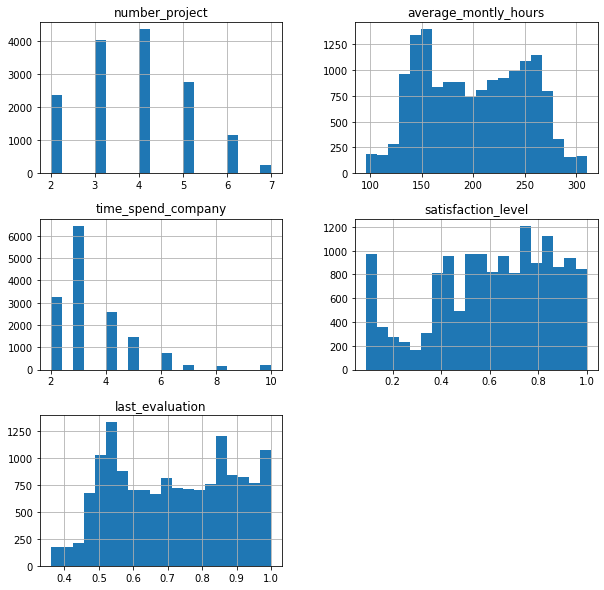

In [ ]:
features = ['number_project', 'average_montly_hours', 'time_spend_company', 'satisfaction_level','last_evaluation']
tabela[features].hist(figsize=(10, 10), bins=20);

A partir dos gráficos acima, podemos perceber:
- As variaveis "number_project" e "time_spend_company" podem ser consideradas como ariáveis discretas
- A variável "average_montly_hours" apresenta uma distribuição semelhante com uma bimodal
- As variáveis "satisfaction_level" e "last_evaluation" apresentam uma distribuição bem semelhantes, o que já era esperado já que as duas variáveis representam o mesmo indicador

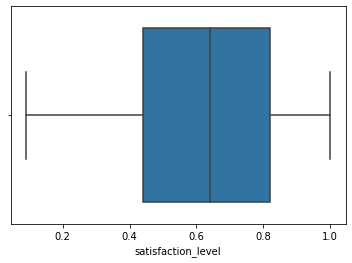

In [ ]:
sns.boxplot(x=tabela["satisfaction_level"])

A variável "sastifaction_level" tem seus valores dispostos entre 0 e 1, o que facilita a não presença de outliers

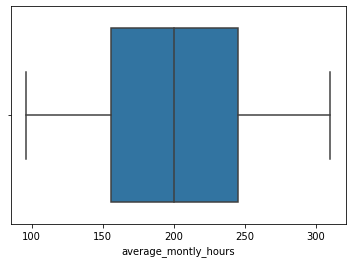

In [ ]:
sns.boxplot(x=tabela["average_montly_hours"])

A variável "average_montly_hours" apresenta um boxplot com uma distribuição bem simetrica entre suas areas

In [ ]:
# ['Work_accident','left','promotion_last_5years','department','salary']
tabela_copy = tabela.copy()
tabela_copy['Work_accident'] = tabela['Work_accident'].astype('category')
tabela_copy['left'] = tabela['left'].astype('category')
tabela_copy['promotion_last_5years'] = tabela['promotion_last_5years'].astype('category')
tabela_copy['department'] = tabela['department'].astype('category')
tabela_copy['salary'] = tabela['salary'].astype('category')
tabela_copy.describe(include=['category', 'bool'])

,Work_accident,left,promotion_last_5years,department,salary
count,14999,14999,14999,14999,14999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,12830,11428,14680,4140,7316


Com essa análise dos dados categoricos podemos perceber que o departamento que mais apresenta empregados é o de vendas, e tambem outro insight é que a maioria dos empregados recebem um salário que é considerado baixo

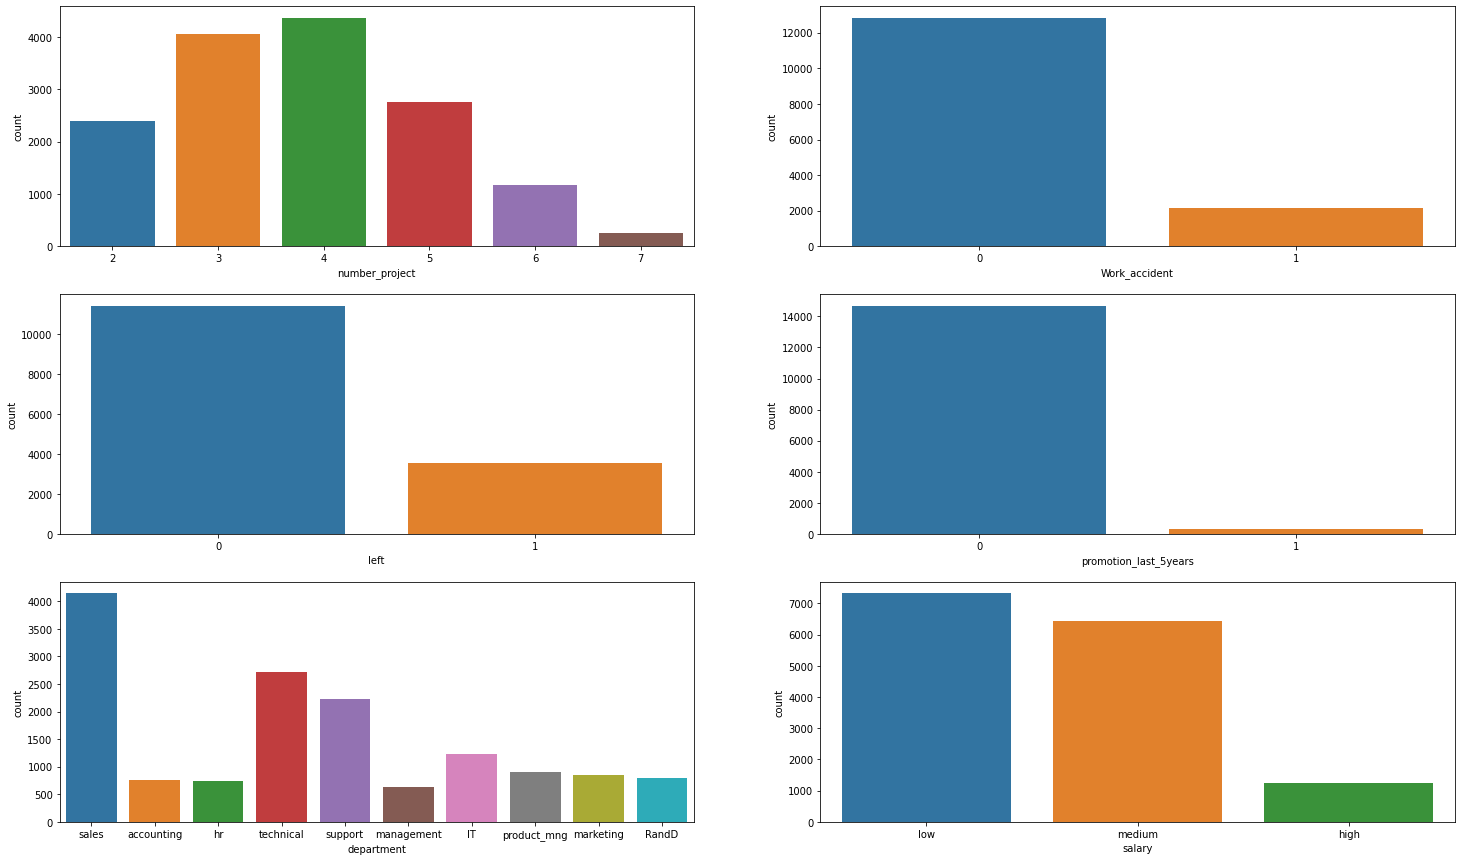

In [ ]:
categorical_features = ['number_project','Work_accident','left','promotion_last_5years','department','salary']
tabela[categorical_features]

_, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 15))
n = 0
for i in range(3):
  for j in range(2):
    sns.countplot(x=categorical_features[n], data=tabela, ax=axes[i,j])
    n += 1;

**Insighsts**
  - A distribuição de números de projetos realizados pelos empregados dessa empresa apresenta uma distribuição assimétrica positiva, e sua moda é igual a 4 (projetos).
  - Quandos estamos falando de promoção no emprego, uma parcela bem pequena da população de colaboradores conseguiu efeuar esse feito dentro desse dataset.
  - Os setores "Sales", "Support" e "Technical" são de longe os departamentos com mais funcionários.
  - A porcentagem de colaboradores que recebem um salário considerado "baixo" e "médio" é bem parecida, enquanto muito poucos colaboradorem recebem um salário que é considerado alto.

# Análise bivariada


    

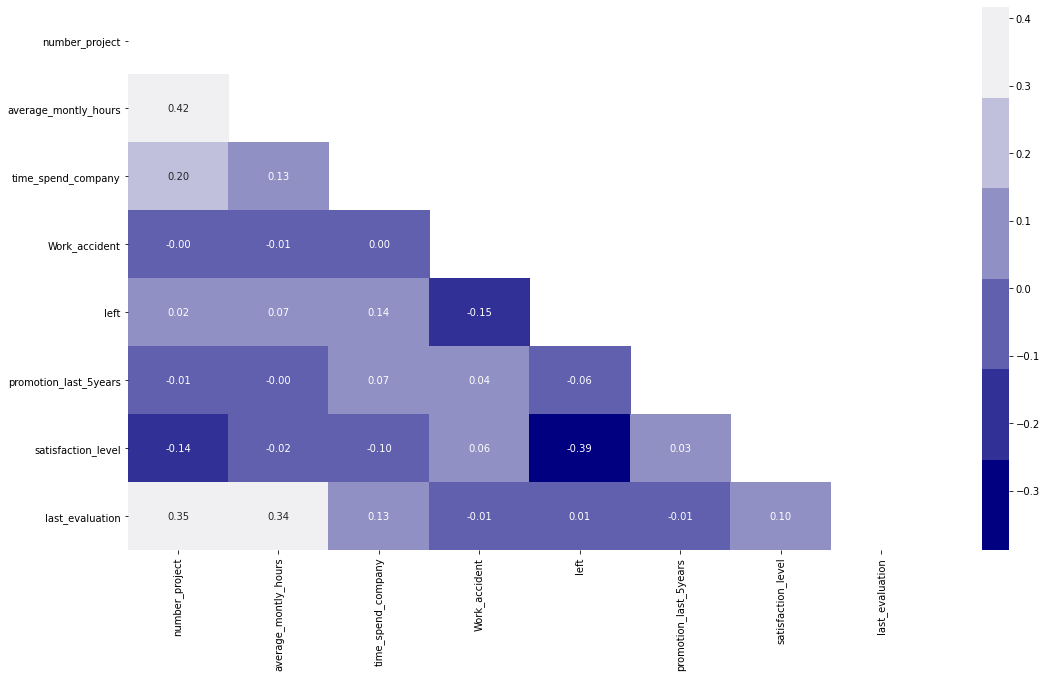

In [ ]:
tabela = tabela.drop(columns='employee_id')

columns =['department', 'salary']
tabelacorr =  tabela.drop(columns=columns)
corr = tabelacorr.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(18, 10))



sns.heatmap(corr, mask=mask, annot = True, fmt = '.2f', cmap=sns.light_palette("navy", reverse=True))

plt.show()

## 1. Quais variáveis mais indicam a saída de um empregado da companhia?


Analisando o resultado da matriz de correlação podemos perceber que não existem correlações lineares fortes entre as variaveis. o que mais se destaca em questão de correlação é a quando consideramos a analise das variáveis **"last_evaluation"** vs **"num_project"** / **"average_montly_hours"**. Isso provavelmente ocorre porque quanto mais projetos um empregado tem em desenvolvimento ele tem uma inclinação a sentir-se mais satisfeito, assim como, isso tbm pode criar condições que corroborem com um aumento de horas de trabalho. Quando estamos considerando se a variável target "left", a variável que apresenta maior correlação é a **"satisfaction_level"**, como já era esperado.

<Figure size 2160x2160 with 0 Axes>

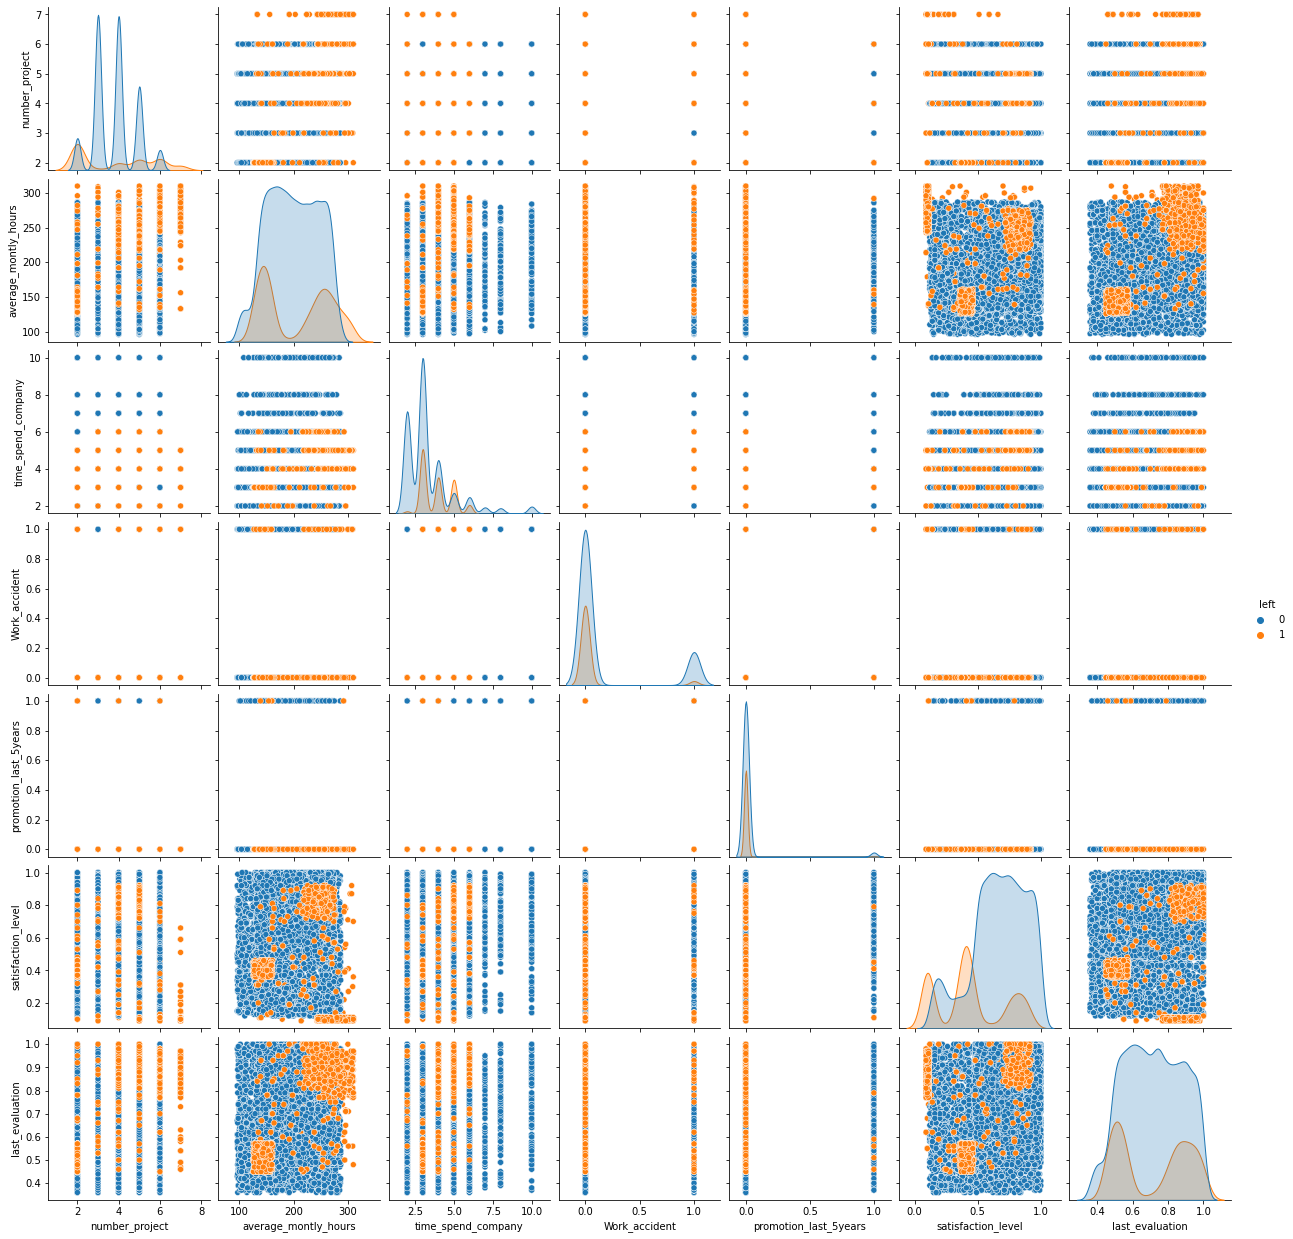

In [ ]:
plt.figure(figsize=(30,30))
g = sns.pairplot(tabelacorr, hue='left')

Embora não tenhamos encontrando relações lineares fortes no dataset, na plotagem de todos gráficos de dispersão possíveis dentro do nosso conjunto de dados, encontramos algumas áreas que apresentavam alta concentração de indivíduos que deixaram o emprego, o que define claramente uma relação não linear entre as variáveis.

## 2. O que explica as principais mudanças de comportamento em empregados que pretendem deixar a companhia?

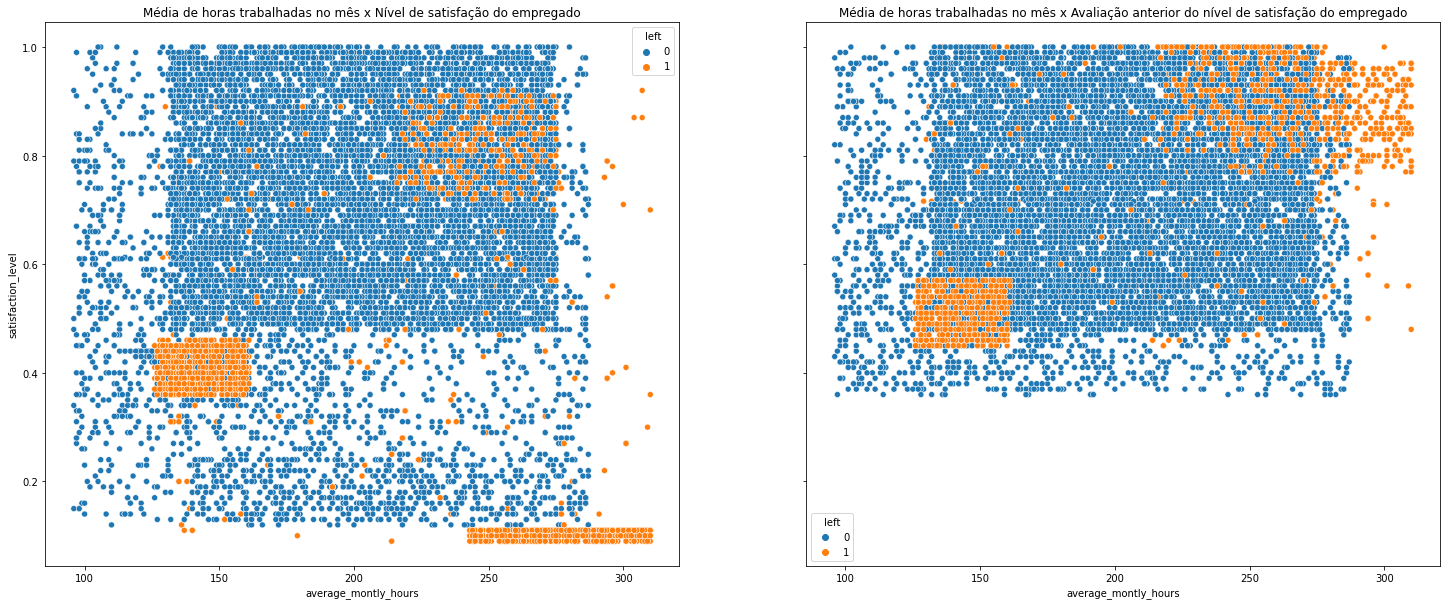

In [ ]:
fig, ax = plt.subplots(ncols=2,  sharey=True, figsize=(25,10))
sns.scatterplot(x='average_montly_hours',y='satisfaction_level', hue='left', data=tabela, ax=ax[0]).set_title('Média de horas trabalhadas no mês x Nível de satisfação do empregado')
sns.scatterplot(x='average_montly_hours',y='last_evaluation', hue='left', data=tabela, ax=ax[1]).set_title('Média de horas trabalhadas no mês x Avaliação anterior do nível de satisfação do empregado');

**Insight**
- Nos gráficos acima mostramos como é bem evidente a relação não linear entre o "Nível de Satisfação" e " Horas trabalhadas no mês"
- O que podemos supor aqui é que existe um padrão de compartamento bem específico do colaborador que predente deixar a empresa, quando falamos em horas trabalhadas no mês.

## 3. Pode-se dizer que promoções impactam na permanência de um empregado na empresa?

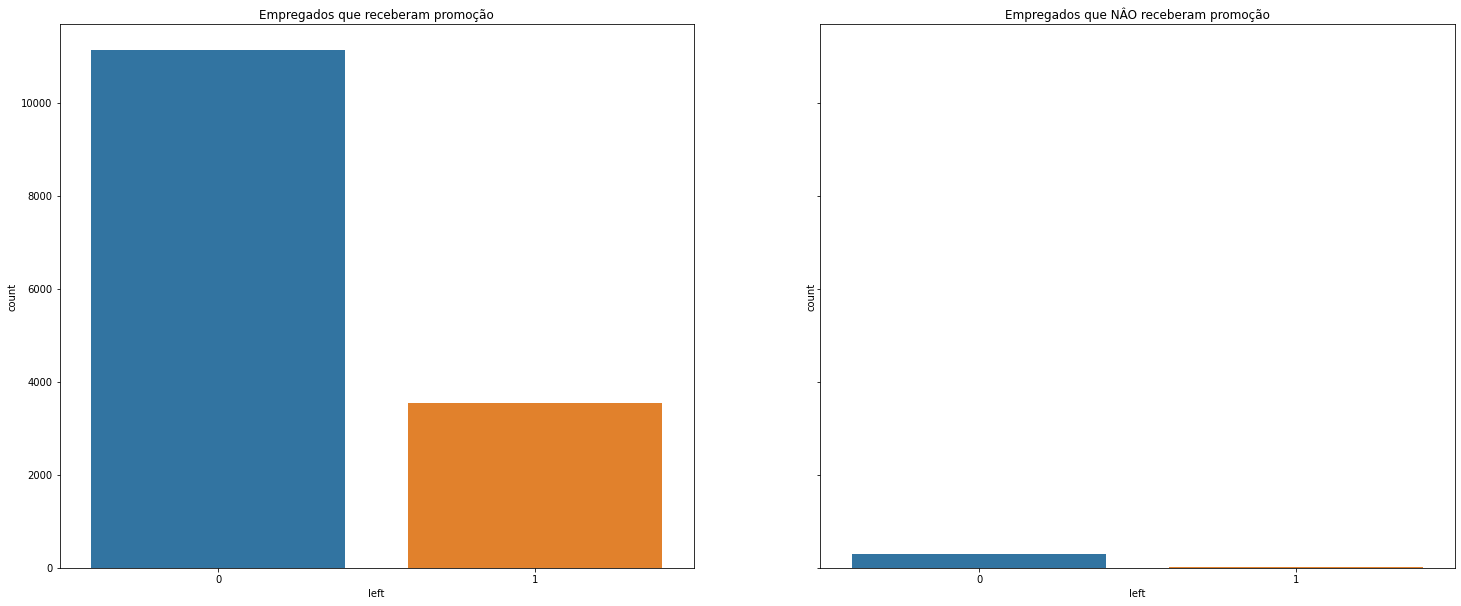

In [ ]:
fig, ax = plt.subplots(ncols=2,  sharey=True, figsize=(25,10))

sns.countplot(x='left', data=tabela[tabela['promotion_last_5years'] == 0], ax=ax[0]).set_title('Empregados que receberam promoção')
sns.countplot(x='left', data=tabela[tabela['promotion_last_5years'] == 1], ax=ax[1]).set_title('Empregados que NÂO receberam promoção');

Tentamos plotar um gráfico de empregados que receberam promoção e não receberam promoção para verificar quais das classes deixaram mais o emprego, mas devido à escala das classes, não conseguimos uma vizualização interessante. Vamos agora fazer um cáculo para saber a porcentagem de indivíduos que deixam o emprego recebendo e não recebendo promoção.

In [ ]:
empregados_sem_promo = tabela['promotion_last_5years'].value_counts()[0] # Quantidades de empregados que NÂO receberam promoção
empregados_com_promo = tabela['promotion_last_5years'].value_counts()[1] # Quantidades de empregados que RECEBERAM promoção
com_promo_sairam = tabela['left'][tabela['promotion_last_5years'] == 1].value_counts()[1] # Quantidades de empregados que CONTINUAM da empresa
sem_promo_sairam = tabela['left'][tabela['promotion_last_5years'] == 0].value_counts()[1] # Quantidades de empregados que SAÍRAM da empresa

print(f"{round(com_promo_sairam /empregados_com_promo * 100 ,2)}% dos empregados que receberam promoção deixaram o emprego.")
print(f"{round(sem_promo_sairam/empregados_sem_promo* 100 ,2)}% dos empregados que NÂO receberam promoção deixaram o emprego.")

5.96% dos empregados que receberam promoção deixaram o emprego.
24.2% dos empregados que NÂO receberam promoção deixaram o emprego.


**Insights**
- O que pudemos tirar do cálculo é que existe uma diferença de quase 20% a mais de chances de um empregado deixar a empresa quando ele não recebe uma promoção, quando analisamos a população dentro desse dataset.

## 4. Existe uma grande diferença entre os níveis de satisfação de um empregado que pretende deixar a companhia e outro que pretende permanescer?

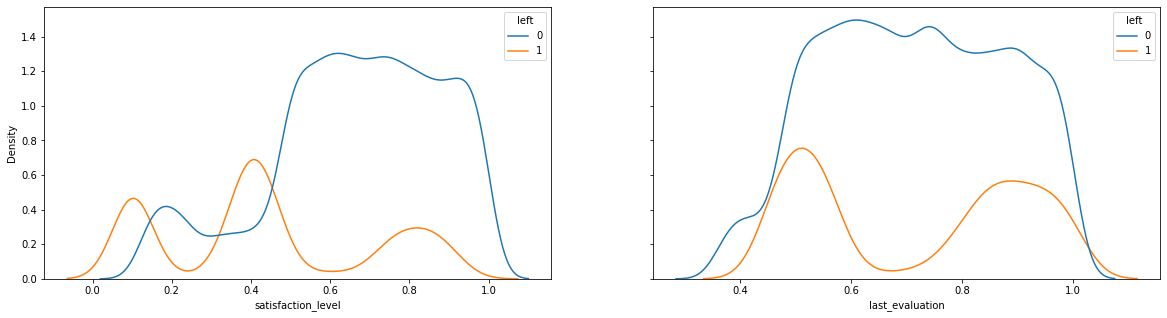

In [ ]:
fig, ax = plt.subplots(ncols=2,  sharey=True, figsize=(20,5))

sns.kdeplot(data=tabela, x="satisfaction_level", hue="left",ax=ax[0])
sns.kdeplot(data=tabela, x="last_evaluation", hue="left",ax=ax[1]);

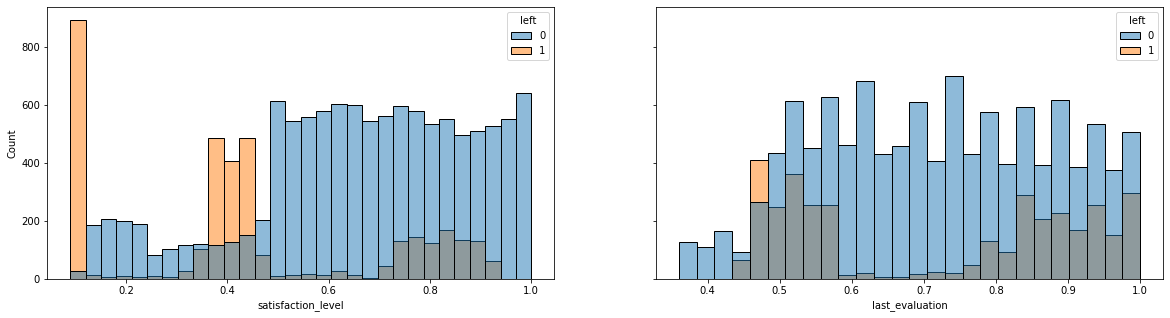

In [ ]:
fig, ax = plt.subplots(ncols=2,  sharey=True, figsize=(20,5))

sns.histplot(data=tabela, x="satisfaction_level", hue="left",ax=ax[0])
sns.histplot(data=tabela, x="last_evaluation", hue="left",ax=ax[1]);

In [ ]:
tabela['left'][tabela['satisfaction_level'] > 0.7].value_counts() / tabela['left'][tabela['satisfaction_level'] > 0.7].value_counts().sum()

0    0.85
1    0.15
Name: left, dtype: float64

**Insights**
- Quando estamos observando o "Nível de Satisfação" atual, podemos ver que 85% dos indivíduos que apresentam um nível de satisfação maior que "0.7" permanecem na empresa. 

## 5. Quais insights podemos ter em relação ao números de projetos que um empregado desenvolve?

Text(0, 0.5, 'Proporção de Empregados')

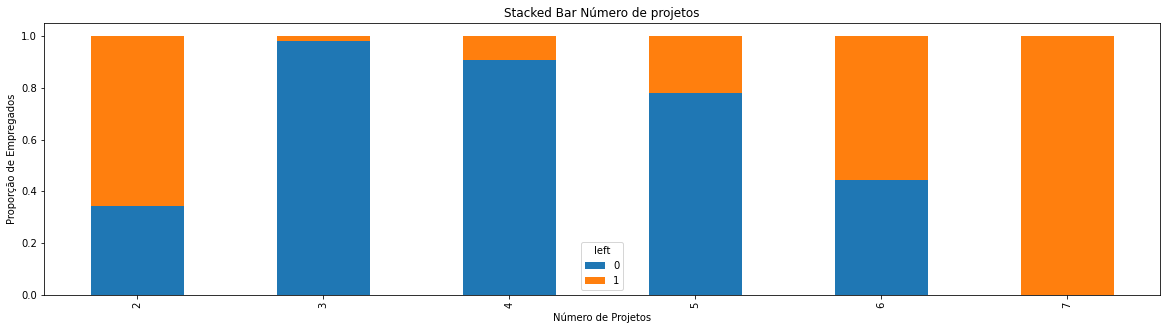

In [ ]:
table=pd.crosstab(tabela.number_project, tabela.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(20,5))
plt.title('Stacked Bar Número de projetos')
plt.xlabel('Número de Projetos')
plt.ylabel('Proporção de Empregados')

In [ ]:
tabela['number_project'][tabela['left'] == 1].value_counts() / tabela['number_project'].value_counts()

2    0.66
3    0.02
4    0.09
5    0.22
6    0.56
7    1.00
Name: number_project, dtype: float64

**Insights**<br>
Avaliando a porcentagem de indivíduos que deixam o emprego em relação ao número de projetos que eles desenvolveram, achamos um padrão interessante.
- Empregados que desenvolvem menos de 3 projetos e mais de 5 projetos tem uma chance de sair do emprego consideravelmente mais alta do que os empregados que estão dentre dessa faixa.
- Uma hipotese para explicar isso pode ser que empregados que apresentam uma baixa performance sintam-se mais insatisfeitos e deixem o emprego, e por outro lado, empregado que performam muito bem se sentem engajados a buscar novos desafios e por isso deixam a empresa.

## 6. O Nível de Salário do empregado diz alguma coisa a respeito da sua permanência ou saída?

Text(0, 0.5, 'Proporção de Empregados')

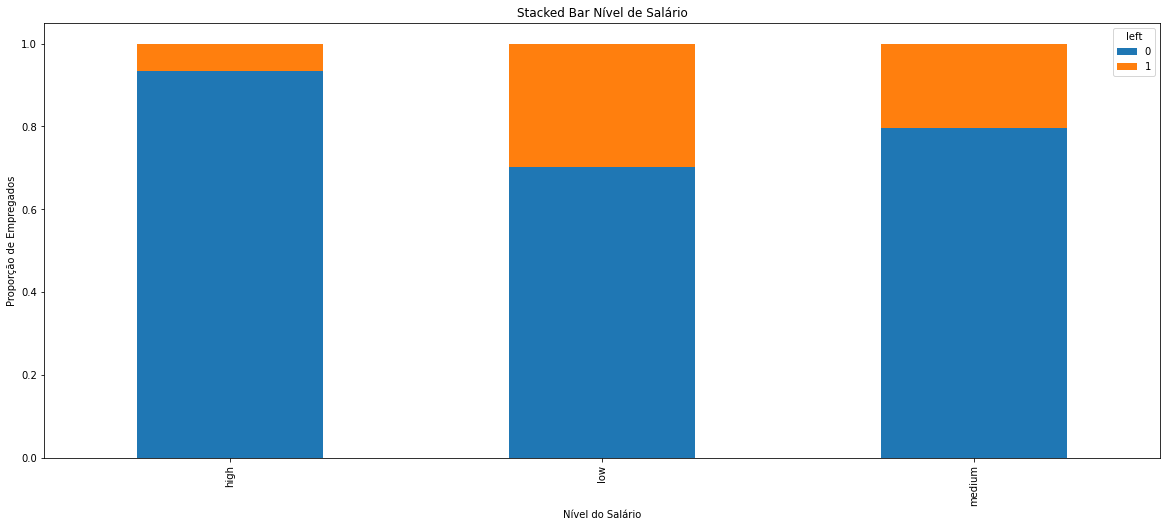

In [ ]:
table=pd.crosstab(tabela.salary, tabela.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(20,8))
plt.title('Stacked Bar Nível de Salário')
plt.xlabel('Nível do Salário')
plt.ylabel('Proporção de Empregados')

In [ ]:
tabela['salary'][tabela['left'] == 1].value_counts() / tabela['salary'].value_counts()

low       0.30
medium    0.20
high      0.07
Name: salary, dtype: float64

**Insight**
- O gráfico acima mostra que a variável "Salário" é um bom indicador da saída de um colaborador, e de acordo com ele, os empregados com salário nível "Low" são os que deixam mais o trabalho, com cerca de 30% de taxa de evasão. 

## 7. Quais departamentos apresentam um maior índice de saída de empregados?


Primeiro vamos criar um dataframe com valores absolutos de empregados que sairam e tambem uma coluna com a porcentagem de empregados que saíram considerando o total dentro de um mesmo departamento.

In [ ]:
dep = pd.DataFrame(tabela['department'][tabela['left'] == 1].value_counts())
total_dep = pd.DataFrame(tabela['department'].value_counts())




dep['department_total'] = total_dep['department'].values
dep['percent_left'] = dep['department'] / dep['department_total']
dep = dep.reset_index()
dep

,index,department,department_total,percent_left
0,sales,1014,4140,0.24
1,technical,697,2720,0.26
2,support,555,2229,0.25
3,IT,273,1227,0.22
4,hr,215,902,0.24
5,accounting,204,858,0.24
6,marketing,203,787,0.26
7,product_mng,198,767,0.26
8,RandD,121,739,0.16
9,management,91,630,0.14


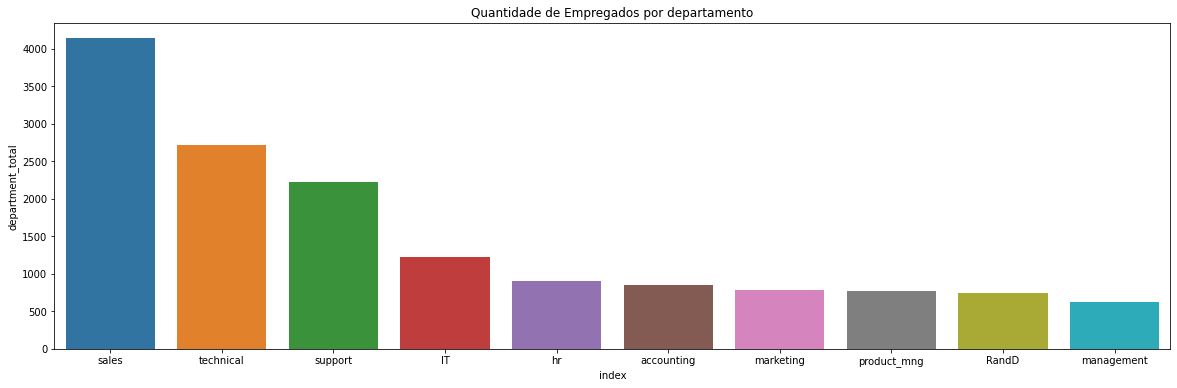

In [ ]:
sns.barplot(x='index',y='department_total',data=dep).set_title('Quantidade de Empregados por departamento')
fig1 = plt.gcf()
fig1.set_size_inches(20,6)

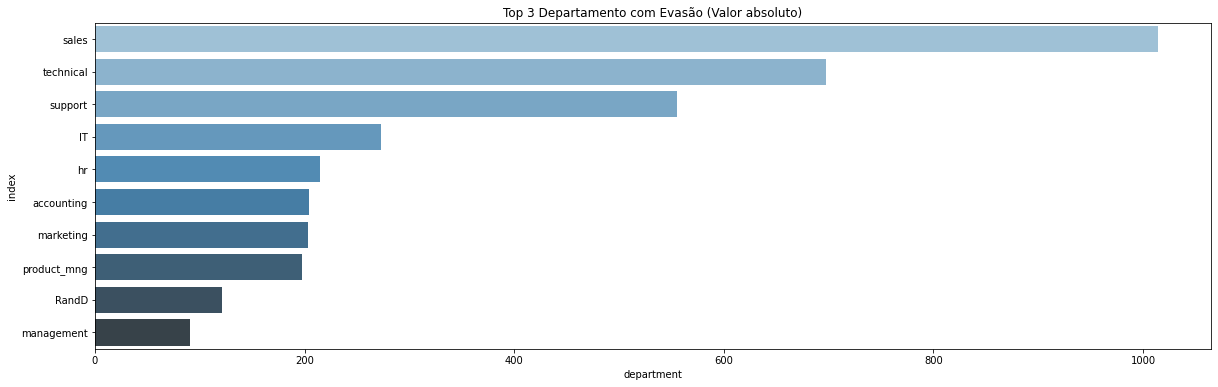

In [ ]:
sns.barplot(x='department',y='index',data=dep,palette='Blues_d').set_title('Top 3 Departamento com Evasão (Valor absoluto)')
fig1 = plt.gcf()
fig1.set_size_inches(20,6)

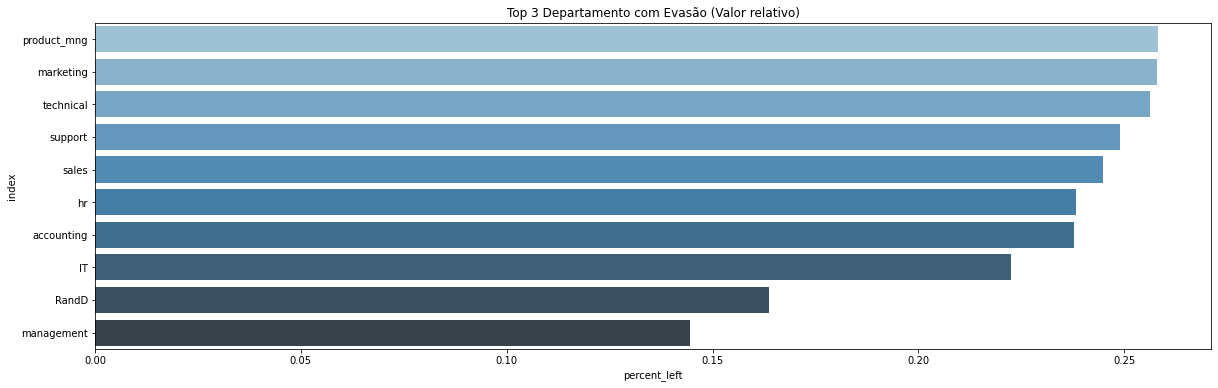

In [ ]:
sns.barplot(x='percent_left',y='index',data=dep.sort_values(by=['percent_left'], ascending=False),palette='Blues_d').set_title('Top 3 Departamento com Evasão (Valor relativo)')
fig1 = plt.gcf()
fig1.set_size_inches(20,6)

**Insights:**
- Quando considerammos fazer uma contagem com valores absolutos de quais departamentos estão apresentando uma taxa maior de saída de colaboradores encontramos o "Sales", "technical" e "support". Antes de inferir qualquer possível causa intrísica ao conjunto de dados a esse resultado, observamos que o gráfico de top 3 departamentos com evasão segue a ordem rankiada dos departamentos com maior quantidade de empregados, e isso deixa claro que esse retorno está sendo influenciada pelo quantidade de empregados em cada departamento
- Quando realizamos uma análise baseada na evasão relativa à quantidade total de empregados dentro de um departamento, temos um resultado mais factível. Nesse resultado, os departamentos "product_mng", "marketing" e "technical" apresental uma maior porcentagem de evasão de empregados